Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats.contingency import association  # cramer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr  # pearson
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import spearmanr  # spearman
from sklearn.metrics import matthews_corrcoef  # matthews

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
products = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Lab4/foodmart.products.tsv", sep="\t"
)
sales = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Lab4/foodmart.sales.tsv", sep="\t"
)

In [ ]:
products.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [ ]:
sales.head()

,product_id,store_id,date,sales
0,4,6,1997-01-01,4
1,25,6,1997-01-01,3
2,48,6,1997-01-01,3
3,76,6,1997-01-01,4
4,119,6,1997-01-01,3


In [ ]:
result = pd.merge(products, sales, on="product_id")
result

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,store_id,date,sales
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,7,1997-01-03,4
1,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,13,1997-01-11,3
2,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,17,1997-02-17,3
3,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,24,1997-03-15,3
4,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,7,1997-04-07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83386,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,16,1997-11-22,3
83387,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,6,1997-12-01,2
83388,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,16,1997-12-05,4
83389,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,7,1997-12-19,2


In [ ]:
sparse_sales = pd.pivot_table(
    result,
    values="sales",
    index=["date", "store_id"],
    columns=["product_name"],
    fill_value=0,
)
sparse_sales

product_name         ADJ Rosy Sunglasses  Akron City Map  \
date       store_id                                        
1997-01-01 6                         0.0             0.0   
           14                        0.0             0.0   
1997-01-02 11                        0.0             0.0   
           23                        0.0             0.0   
1997-01-03 7                         0.0             0.0   
...                                  ...             ...   
1997-12-28 13                        0.0             0.0   
           22                        0.0             0.0   
1997-12-29 6                         0.0             0.0   
           7                         0.0             0.0   
1997-12-30 14                        0.0             0.0   

product_name         Akron Eyeglass Screwdriver  American Beef Bologna  \
date       store_id                                                      
1997-01-01 6                                0.0                    0.0   
           14                               0.0                    0.0   
1997-01-02 11                               0.0                    0.0   
           23                               0.0                    0.0   
1997-01-03 7                                0.0                    0.0   
...                                         ...                    ...   
1997-12-28 13                               0.0                    0.0   
           22                               0.0                    0.0   
1997-12-29 6                                0.0                    0.0   
           7                                0.0                    0.0   
1997-12-30 14                               0.0                    0.0   

product_name         American Chicken Hot Dogs  American Cole Slaw  \
date       store_id                                                  
1997-01-01 6                               0.0                 0.0   
           14                              0.0                 0.0   
1997-01-02 11                              0.0                 0.0   
           23                              0.0                 0.0   
1997-01-03 7                               0.0                 0.0   
...                                        ...                 ...   
1997-12-28 13                              0.0                 0.0   
           22                              0.0                 0.0   
1997-12-29 6                               0.0                 0.0   
           7                               3.0                 0.0   
1997-12-30 14                              0.0                 0.0   

product_name         American Corned Beef  American Foot-Long Hot Dogs  \
date       store_id                                                      
1997-01-01 6                          0.0                          0.0   
           14                         0.0                          0.0   
1997-01-02 11                         0.0                          0.0   
           23                         0.0                          0.0   
1997-01-03 7                          0.0                          0.0   
...                                   ...                          ...   
1997-12-28 13                         4.0                          0.0   
           22                         0.0                          0.0   
1997-12-29 6                          0.0                          0.0   
           7                          0.0                          0.0   
1997-12-30 14                         0.0                          0.0   

product_name         American Low Fat Bologna  American Low Fat Cole Slaw  \
date       store_id                                                         
1997-01-01 6                              0.0                         0.0   
           14                             0.0                         0.0   
1997-01-02 11                             0.0                         0.0 

In [ ]:
spearman_corr = sparse_sales.corr(method="spearman")
spearman_corr

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.097969,0.001993,0.041981,0.050371,-0.033882,-0.007844,0.077134,0.019108,-0.007614,...,0.033237,0.112359,0.076139,0.018318,0.005265,0.018996,0.018471,0.099764,0.039577,0.018928
Akron City Map,0.097969,1.000000,0.022436,0.098703,0.030165,0.030935,0.031788,-0.002137,0.047911,0.098667,...,0.005623,0.030795,0.039333,-0.001983,-0.053719,0.013590,0.040211,0.022333,0.090423,0.055622
Akron Eyeglass Screwdriver,0.001993,0.022436,1.000000,-0.036888,0.029858,0.076507,-0.005579,0.123704,0.052521,0.088301,...,-0.006781,0.004975,0.059180,0.067207,0.046000,-0.016040,-0.003019,0.040994,-0.001277,0.108524
American Beef Bologna,0.041981,0.098703,-0.036888,1.000000,0.027961,-0.032650,0.027374,-0.016565,-0.041241,0.070463,...,0.009394,0.063805,-0.057211,-0.022645,0.005515,0.092713,-0.007196,0.059298,0.059979,0.040561
American Chicken Hot Dogs,0.050371,0.030165,0.029858,0.027961,1.000000,0.014187,-0.000718,0.051069,0.048408,0.058423,...,0.082403,-0.019304,0.070678,0.071697,0.036806,0.062295,-0.021510,-0.007004,0.105569,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.018996,0.013590,-0.016040,0.092713,0.062295,-0.015969,0.050453,-0.003126,-0.007714,0.042247,...,-0.032531,-0.053064,-0.007445,-0.002923,0.037459,1.000000,0.015116,0.018770,0.025268,0.013656
Washington Diet Soda,0.018471,0.040211,-0.003019,-0.007196,-0.021510,0.074140,0.053977,0.020414,0.013718,-0.007546,...,-0.039151,0.047079,0.107883,0.088316,-0.019259,0.015116,1.000000,-0.025042,0.014216,-0.039504
Washington Mango Drink,0.099764,0.022333,0.040994,0.059298,-0.007004,0.091507,0.056937,0.021470,0.075320,0.011497,...,-0.028520,-0.024756,-0.003357,0.041751,0.159320,0.018770,-0.025042,1.000000,-0.000819,-0.048897


In [ ]:
pearson_corr = sparse_sales.corr(method="pearson")
pearson_corr

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.076608,-0.006581,0.038685,0.041105,-0.045887,-0.008466,0.062309,0.033752,-0.009656,...,0.053533,0.072249,0.061736,-0.000735,0.000843,0.028226,0.012653,0.089932,0.072668,0.035745
Akron City Map,0.076608,1.000000,0.026297,0.088709,0.061144,0.039347,0.019767,-0.005998,0.010270,0.078176,...,-0.021793,0.020514,0.051956,-0.001018,-0.032582,0.007142,0.035274,0.033875,0.078070,0.051952
Akron Eyeglass Screwdriver,-0.006581,0.026297,1.000000,-0.040851,0.034345,0.108726,0.007573,0.162355,0.020933,0.074292,...,-0.000237,-0.001297,0.049793,0.055047,0.031202,0.013510,-0.017855,0.022714,0.003156,0.163519
American Beef Bologna,0.038685,0.088709,-0.040851,1.000000,0.014780,-0.039118,-0.007890,-0.008264,-0.045949,0.085975,...,0.000197,0.081151,-0.053404,-0.021832,0.003286,0.090774,-0.031954,0.043843,0.080638,0.055211
American Chicken Hot Dogs,0.041105,0.061144,0.034345,0.014780,1.000000,-0.005336,0.017765,0.057972,0.071549,0.052460,...,0.098935,-0.024224,0.066212,0.043765,0.077541,0.045038,-0.037246,0.025975,0.129795,-0.008498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.028226,0.007142,0.013510,0.090774,0.045038,-0.019134,0.065257,0.008475,-0.014765,0.040917,...,-0.021486,-0.048885,-0.024276,0.014478,0.023574,1.000000,0.018490,0.047577,0.005696,0.027834
Washington Diet Soda,0.012653,0.035274,-0.017855,-0.031954,-0.037246,0.080757,0.066493,0.034888,-0.001253,0.008366,...,-0.025958,0.037920,0.111450,0.090849,0.023312,0.018490,1.000000,-0.030056,0.009293,-0.046996
Washington Mango Drink,0.089932,0.033875,0.022714,0.043843,0.025975,0.087489,0.068372,0.028454,0.080489,0.013144,...,-0.020503,-0.031946,-0.026589,0.026534,0.116748,0.047577,-0.030056,1.000000,0.014672,-0.051093


In [ ]:
max_corr_pearson = (
    pearson_corr["American Chicken Hot Dogs"].drop("American Chicken Hot Dogs").idxmax()
)
max_corr_pearson_value = (
    pearson_corr["American Chicken Hot Dogs"].drop("American Chicken Hot Dogs").max()
)
max_corr_spearman = (
    spearman_corr["American Chicken Hot Dogs"]
    .drop("American Chicken Hot Dogs")
    .idxmax()
)
max_corr_spearman_value = (
    spearman_corr["American Chicken Hot Dogs"].drop("American Chicken Hot Dogs").max()
)
print(
    max_corr_pearson, max_corr_pearson_value, max_corr_spearman, max_corr_spearman_value
)

Mighty Good Monthly Home Magazine 0.24026934048270548 Great Cranberry Muffins 0.1981052950789763


<Axes: xlabel='Mighty Good Monthly Home Magazine', ylabel='American Chicken Hot Dogs'>

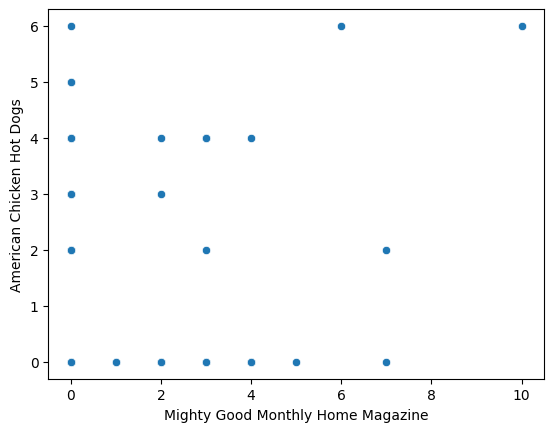

In [ ]:
sns.scatterplot(
    x=sparse_sales[max_corr_pearson], y=sparse_sales["American Chicken Hot Dogs"]
)

<Axes: xlabel='Great Cranberry Muffins', ylabel='American Chicken Hot Dogs'>

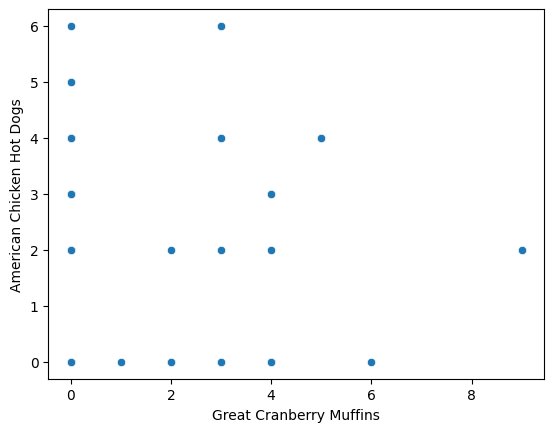

In [ ]:
sns.scatterplot(
    x=sparse_sales[max_corr_spearman], y=sparse_sales["American Chicken Hot Dogs"]
)

<Axes: xlabel='date', ylabel='American Chicken Hot Dogs'>

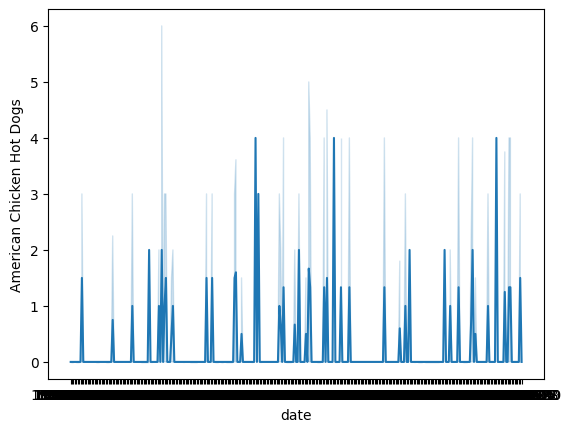

In [ ]:
sns.lineplot(sparse_sales, x="date", y="American Chicken Hot Dogs")

<Axes: xlabel='date', ylabel='Mighty Good Monthly Home Magazine'>

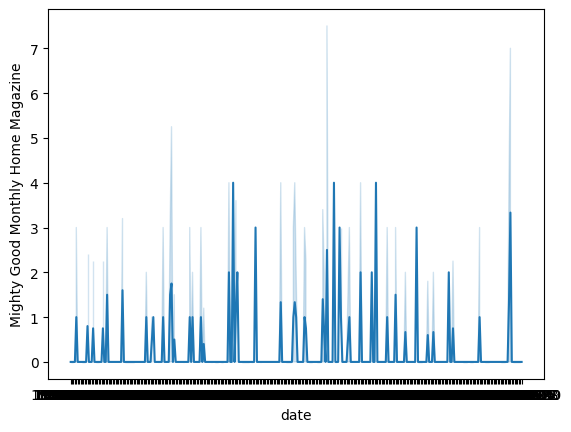

In [ ]:
sns.lineplot(sparse_sales, x="date", y=max_corr_pearson)

<Axes: xlabel='date', ylabel='Great Cranberry Muffins'>

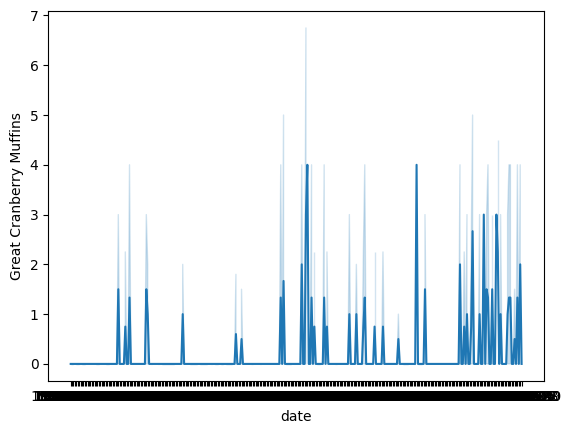

In [ ]:
sns.lineplot(sparse_sales, x="date", y=max_corr_spearman)

In [ ]:
matthew_corr = matthews_corrcoef(products["recyclable_package"], products["low_fat"])
matthew_corr

-0.02675542252327238

<Axes: xlabel='recyclable_package', ylabel='Count'>

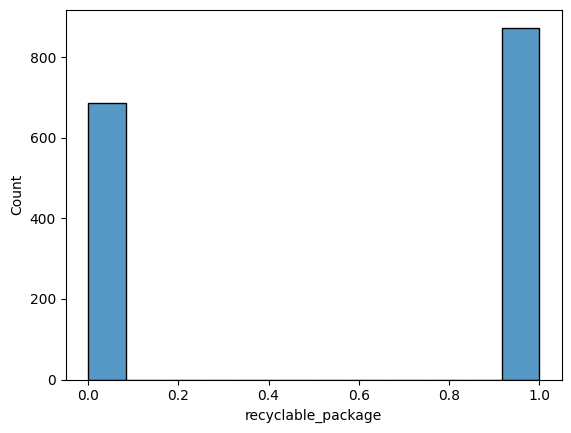

In [ ]:
sns.histplot(products["recyclable_package"])

<Axes: xlabel='low_fat', ylabel='Count'>

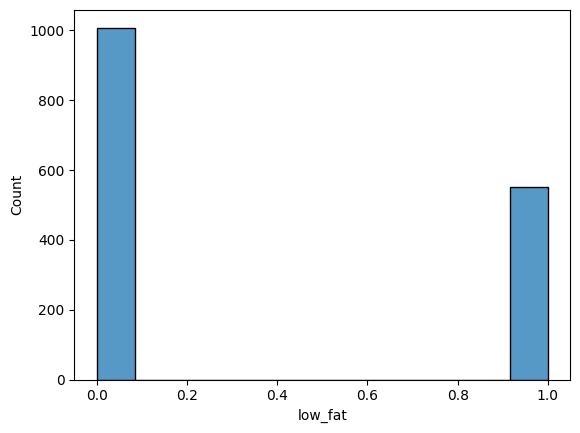

In [ ]:
sns.histplot(products["low_fat"])

In [ ]:
contingency_table = pd.crosstab(result["store_id"], result["brand_name"])
cramer = association(contingency_table)
cramer

0.0343024046787291

<Axes: xlabel='brand_name', ylabel='store_id'>

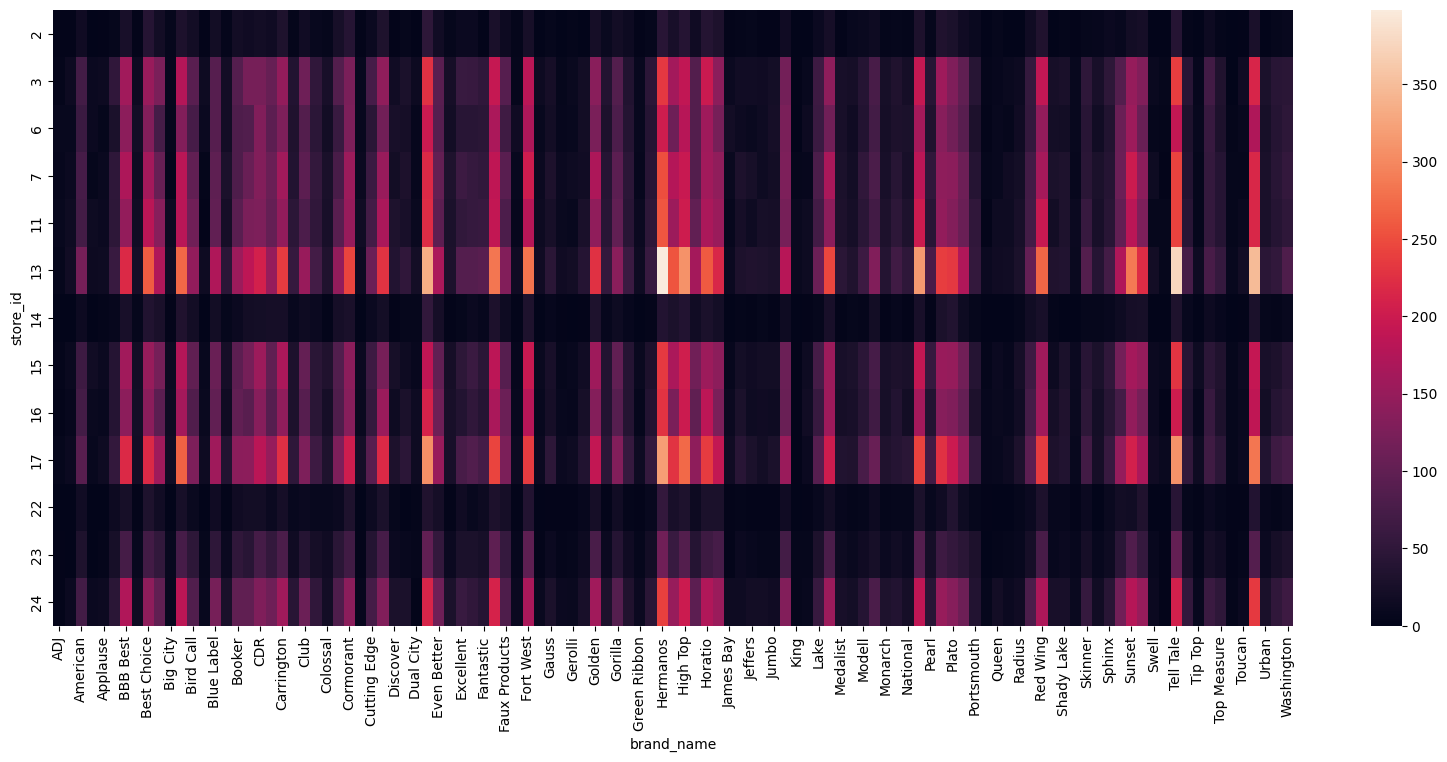

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(contingency_table)